Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results

In [1]:
import scipy.stats as stats

# Sample data
sample = [50, 48, 52, 49, 51, 50, 52, 47, 48, 51]

# Sample size
n = len(sample)

# Sample mean
sample_mean = sum(sample) / n

# Sample standard deviation
sample_stdev = (sum([(x - sample_mean)**2 for x in sample]) / (n - 1)) ** 0.5

# Calculate the standard error of the mean
standard_error = sample_stdev / (n ** 0.5)

# Calculate the t-value for the given confidence level and degrees of freedom
t_value = stats.t.ppf(1 - 0.05 / 2, n - 1)

# Calculate the confidence interval
lower_bound = sample_mean - t_value * standard_error
upper_bound = sample_mean + t_value * standard_error

# Print the results
print("The 95% confidence interval is: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))

The 95% confidence interval is: [48.55, 51.05]


Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05

In [2]:
import scipy.stats as stats, numpy as np

ex_percentage=[20,20,20,10,10,20]

h0= "colors of M&Ms in a bag matches the expected distribution"
h1="colors of M&Ms in a bag does not matche the expected distribution"
# we are taking n= 150

expected= [int((i*150)/100) for i in ex_percentage]
observed= reversed(expected)
observed=[i for i in observed]
alpha= 0.05
ci=1-alpha

crtical_value=stats.chi2.ppf(ci, len(observed)-1)
xx, p_val= stats.chisquare(observed, expected)


if xx > crtical_value:
    print("Reject The Null Hypothesis:::", h0)
else:
    print("Fail to reject the Null Hypothesis", h0)

Reject The Null Hypothesis::: colors of M&Ms in a bag matches the expected distribution


In [3]:
# X_square= (((20-15)**2)/15)+(((10-25)**2)/25)+(((15-20)**2)/20)
dof= 2
significance_level=0.05

In [4]:
stats.chi2.ppf(1-significance_level, dof)

5.991464547107979

In [5]:
# the question is wrong for p value
stats, p_val= stats.chisquare([20,10,15], [15,25,20])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.3333333333333333


Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [7]:
# CI = p ± z*sqrt(p*(1-p)/n)

import math

p = 60/500 # sample proportion
n = 500 # sample size
z = 1.96 # z-score for a 95% confidence level

standard_error = math.sqrt(p*(1-p)/n)
margin_of_error = z*standard_error

lower_bound = p - margin_of_error
upper_bound = p + margin_of_error

print(f"The 95% confidence interval  who smoke is ({lower_bound:.3f}, {upper_bound:.3f})")

The 95% confidence interval  who smoke is (0.092, 0.148)


Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results

In [8]:
import math

x_bar = 75 # sample mean
sigma = 12 # population standard deviation
n = 1 # sample size
z = 1.645 # z-score for a 90% confidence level

standard_error = sigma / math.sqrt(n)
margin_of_error = z * standard_error

lower_bound = x_bar - margin_of_error
upper_bound = x_bar + margin_of_error

print(f"The 90% confidence interval is ({lower_bound:.2f}, {upper_bound:.2f})")

The 90% confidence interval is (55.26, 94.74)


Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

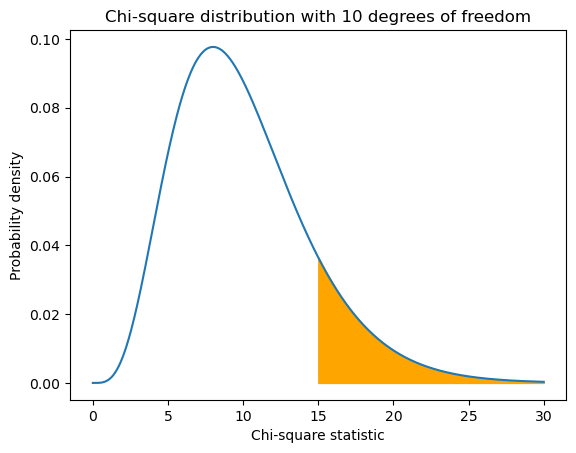

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define the degrees of freedom
df = 10

# Define the range of x values
x = np.linspace(0, 30, 500)

# Calculate the chi-square PDF for the given degrees of freedom
chi2_pdf = chi2.pdf(x, df)

# Create a plot of the chi-square PDF
plt.plot(x, chi2_pdf)

# Shade the area corresponding to a chi-square statistic of 15
x_shade = np.linspace(15, 30, 100)
y_shade = chi2.pdf(x_shade, df)
plt.fill_between(x_shade, y_shade, color='orange')

# Label the axes and add a title
plt.xlabel('Chi-square statistic')
plt.ylabel('Probability density')
plt.title('Chi-square distribution with 10 degrees of freedom')

# Display the plot
plt.show()

Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [10]:
import math
from scipy.stats import norm

# Sample size
n = 1000

# Sample proportion
p_hat = 0.52

# Critical value for 99% confidence interval
z_star = norm.ppf(0.995)

# Margin of error
margin_of_error = z_star * math.sqrt((p_hat * (1 - p_hat))/n)

# Lower and upper bounds of the confidence interval
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

# Display the confidence interval
print(f"The 99% confidence interval is ({lower_bound:.4f}, {upper_bound:.4f})")

The 99% confidence interval is (0.4793, 0.5607)


Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

Lung Cancer: Yes  Lung Cancer: No

Smoker 60 140

Non-smoker 30 170


Use a significance level of 0.05.

In [12]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
observed = np.array([[60, 140], [30, 170]])

# Calculate the chi-square test statistic, p-value, and degrees of freedom
chi_sq_stat, p_value, dof, expected = chi2_contingency(observed)

# Compare the p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between smoking status and lung cancer diagnosis. We reject the null hypothesis.")
else:
    print("There is no significant association between smoking status and lung cancer diagnosis. We fail to reject the null hypothesis.")

There is a significant association between smoking status and lung cancer diagnosis. We reject the null hypothesis.



Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin Use a significance level of 0.01

Milk Chocolat e Dark Chocolate  White Chocolate

U.S. (n=500) 200 150 150

U.K. (n=500) 225 175 100

Dark Chocolate White Chocolate

In [14]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
observed = np.array([[200, 150, 150], [225, 175, 100]])

# Calculate the chi-square test statistic, p-value, and degrees of freedom
chi_sq_stat, p_value, dof, expected = chi2_contingency(observed)

# Compare the p-value to the significance level
alpha = 0.01
if p_value < alpha:
    print("There is a significant association between chocolate preference and country of origin. We reject the null hypothesis.")
else:
    print("There is no significant association between chocolate preference and country of origin. We fail to reject the null hypothesis.")

There is a significant association between chocolate preference and country of origin. We reject the null hypothesis.


Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05

In [15]:
import numpy as np
from scipy.stats import t

# Define the sample statistics
sample_mean = 72
sample_std = 10
sample_size = 30

# Define the null hypothesis
null_hypothesis = 70

# Calculate the t-test statistic and p-value
t_stat = (sample_mean - null_hypothesis) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1 - t.cdf(abs(t_stat), sample_size - 1))

# Compare the p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("The population mean is significantly different from 70. We reject the null hypothesis.")
else:
    print("The population mean is not significantly different from 70. We fail to reject the null hypothesis.")

The population mean is not significantly different from 70. We fail to reject the null hypothesis.
